In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load datasets
order_details = pd.read_csv("Order_Details_19795F61CF.csv")
sales_target = pd.read_csv("Sales_target_DD2E9B96A0.csv")
list_of_orders = pd.read_csv("List_of_Orders_55FFC79CF8.csv")

# Part 1: Sales and Profitability Analysis

Merge the List of Orders and Order Details datasets on the basis of Order ID.
Calculate the total sales (Amount) for each category across all orders.

In [ ]:
merged_data = pd.merge(order_details, list_of_orders, on="Order ID")

In [ ]:
category_sales = merged_data.groupby("Category")["Amount"].sum().reset_index()
category_sales.rename(columns={"Amount": "Total Sales"}, inplace=True)
print("Total Sales for each Category:")
print(category_sales)

Total Sales for each Category:
      Category  Total Sales
0     Clothing     139054.0
1  Electronics     165267.0
2    Furniture     127181.0


<ipython-input-5-559de076e9a2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Total Sales", data=category_sales, palette="viridis")


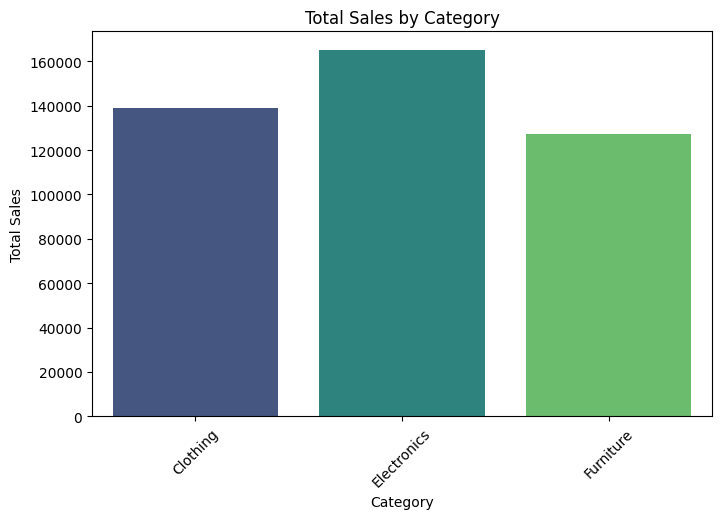

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Total Sales", data=category_sales, palette="viridis")
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

For each category, calculate the average profit per order and total profit margin
(profit as a percentage of Amount).

In [ ]:
# Calculate the total profit and average profit per order
category_profit = merged_data.groupby("Category")["Profit"].sum().reset_index()
category_order_count = merged_data.groupby("Category")["Order ID"].count().reset_index()
category_profit["Avg Profit per Order"] = category_profit["Profit"] / category_order_count["Order ID"]
print("\nAverage Profit per Order for each Category:")
print(category_profit[["Category", "Avg Profit per Order"]])


Average Profit per Order for each Category:
      Category  Avg Profit per Order
0     Clothing             11.762908
1  Electronics             34.071429
2    Furniture              9.456790


In [ ]:
# Calculate the total profit margin (profit as a percentage of Amount)
category_profit["Profit Margin (%)"] = (category_profit["Profit"] / category_sales["Total Sales"]) * 100
print("\nProfit Margin for each Category:")
print(category_profit[["Category", "Profit Margin (%)"]])


Profit Margin for each Category:
      Category  Profit Margin (%)
0     Clothing           8.027817
1  Electronics           6.349725
2    Furniture           1.806874


<ipython-input-8-98d349506324>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Category", y="Profit Margin (%)", data=category_profit, palette="coolwarm")


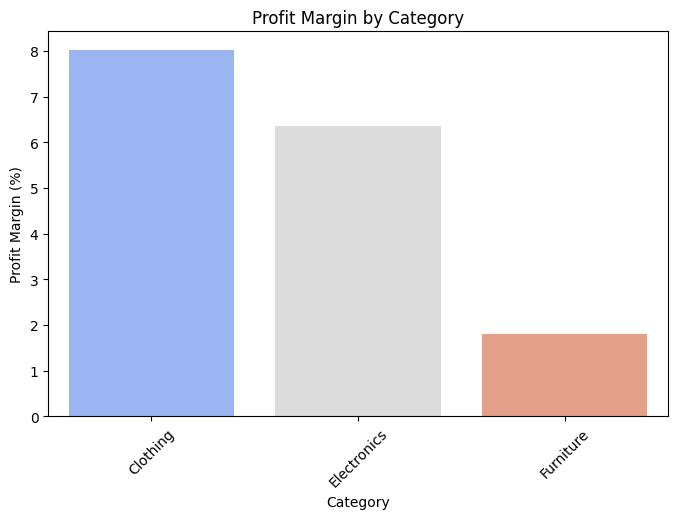

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Category", y="Profit Margin (%)", data=category_profit, palette="coolwarm")
plt.title("Profit Margin by Category")
plt.xticks(rotation=45)
plt.show()

Identify the top-performing and underperforming categories based on these
metrics. Also, suggest reasons for their performance diEerences.

In [ ]:
# Identify top-performing and underperforming categories
category_performance = category_sales.merge(category_profit, on="Category")
sorted_categories = category_performance.sort_values(by="Profit Margin (%)", ascending=False)
top_category = sorted_categories.iloc[0]
underperforming_category = sorted_categories.iloc[-1]

In [ ]:
print("\nTop-performing Category:")
print(top_category)
print("\nUnderperforming Category:")
print(underperforming_category)



Top-performing Category:
Category                 Clothing
Total Sales              139054.0
Profit                    11163.0
Avg Profit per Order    11.762908
Profit Margin (%)        8.027817
Name: 0, dtype: object

Underperforming Category:
Category                Furniture
Total Sales              127181.0
Profit                     2298.0
Avg Profit per Order      9.45679
Profit Margin (%)        1.806874
Name: 2, dtype: object


# Part 2: Target Achievement Analysis

Using the Sales Target dataset, calculate the percentage change in target sales
for the Furniture category month-over-month.

In [ ]:
furniture_target = sales_target[sales_target["Category"] == "Furniture"].copy()

In [ ]:
#  Converting 'Month of Order Date' to datetime format for proper sorting
furniture_target["Month of Order Date"] = pd.to_datetime(furniture_target["Month of Order Date"], format="%b-%y")
furniture_target.sort_values(by="Month of Order Date", inplace=True)

#  Calculating the percentage change in target sales month-over-month
furniture_target.loc[:, "Percentage Change"] = furniture_target["Target"].pct_change() * 100
furniture_target["Percentage Change"].fillna(0, inplace=True)
print("\nPercentage Change in Target Sales for Furniture Category:")
print(furniture_target[["Month of Order Date", "Percentage Change"]])


Percentage Change in Target Sales for Furniture Category:
   Month of Order Date  Percentage Change
0           2018-04-01           0.000000
1           2018-05-01           0.961538
2           2018-06-01           0.952381
3           2018-07-01           1.886792
4           2018-08-01           0.925926
5           2018-09-01           0.917431
6           2018-10-01           0.909091
7           2018-11-01           1.801802
8           2018-12-01           0.884956
9           2019-01-01           0.877193
10          2019-02-01           0.869565
11          2019-03-01           1.724138


<ipython-input-12-268949284ebf>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  furniture_target["Percentage Change"].fillna(0, inplace=True)


In [ ]:
#  Identify months with significant target fluctuations
significant_fluctuations = furniture_target[abs(furniture_target["Percentage Change"]) > 20]
print("\nMonths with Significant Target Fluctuations:")
if significant_fluctuations.empty:
    print("No significant fluctuations detected.")
else:
    print(significant_fluctuations)


Months with Significant Target Fluctuations:
No significant fluctuations detected.


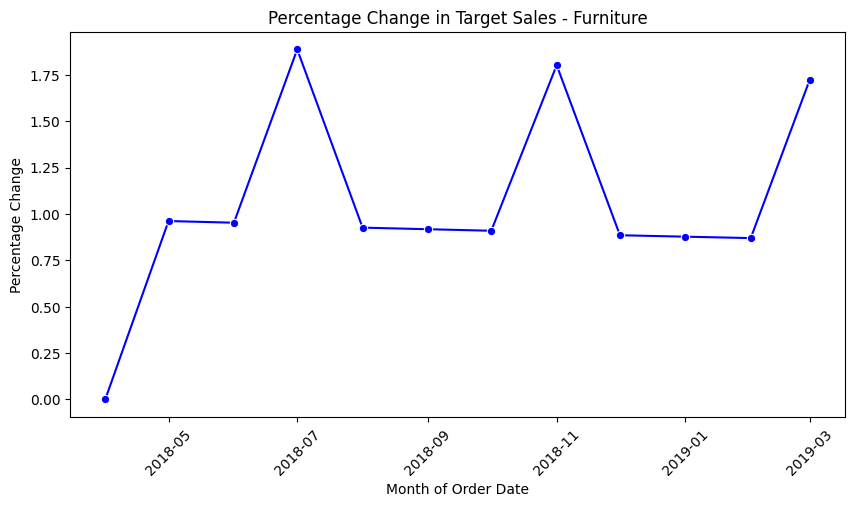

In [ ]:
plt.figure(figsize=(10, 5))
sns.lineplot(x="Month of Order Date", y="Percentage Change", data=furniture_target, marker="o", color="b")
plt.title("Percentage Change in Target Sales - Furniture")
plt.xticks(rotation=45)
plt.show()

# Part 3: Regional Performance Insights

 From the List of Orders dataset, identify the top 5 states with the highest order
count. For each of these states, calculate the total sales and average profit.

In [ ]:
# Identifing the top 5 states with the highest order count
top_states = list_of_orders["State"].value_counts().nlargest(5).index.tolist()
print(top_states)

['Madhya Pradesh', 'Maharashtra', 'Rajasthan', 'Gujarat', 'Punjab']


In [ ]:
# Calculating total sales and average profit for each of these states
regional_data = merged_data[merged_data["State"].isin(top_states)]
state_sales = regional_data.groupby("State")["Amount"].sum().reset_index()
state_sales.rename(columns={"Amount": "Total Sales"}, inplace=True)
state_profit = regional_data.groupby("State")["Profit"].mean().reset_index()
state_profit.rename(columns={"Profit": "Average Profit"}, inplace=True)
regional_performance = state_sales.merge(state_profit, on="State")

print("\nTop 5 States with Highest Order Count - Sales and Average Profit:")
print(regional_performance)


Top 5 States with Highest Order Count - Sales and Average Profit:
            State  Total Sales  Average Profit
0         Gujarat      21058.0        5.344828
1  Madhya Pradesh     105140.0       16.326471
2     Maharashtra      95348.0       21.296552
3          Punjab      16786.0      -10.150000
4       Rajasthan      21149.0       16.986486


<ipython-input-17-617df3b5701b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Total Sales", data=regional_performance, palette="magma")


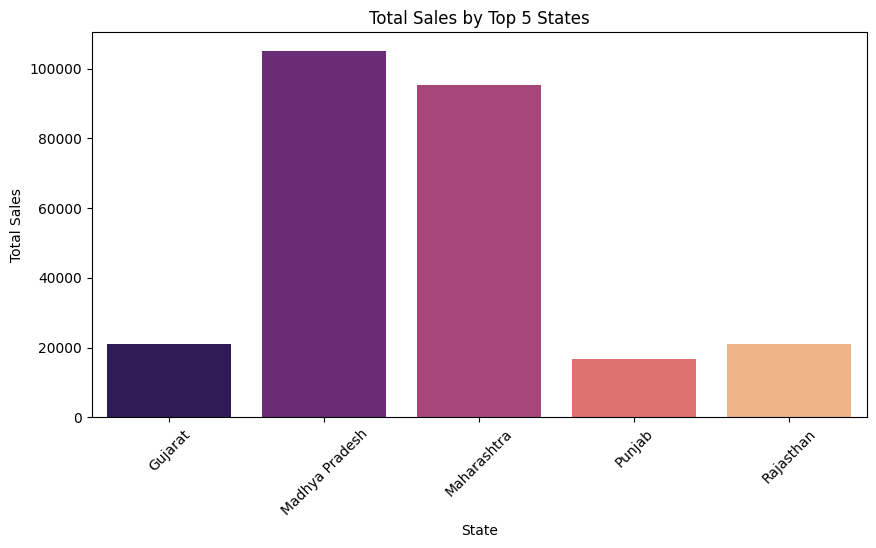

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x="State", y="Total Sales", data=regional_performance, palette="magma")
plt.title("Total Sales by Top 5 States")
plt.xticks(rotation=45)
plt.show()

In [ ]:
#  Highlight regional disparities in sales or profitability
low_performing_states = regional_performance.sort_values(by=["Total Sales", "Average Profit"], ascending=[True, True]).head(2)
print("\nRegions with Lower Performance:")
print(low_performing_states)


Regions with Lower Performance:
     State  Total Sales  Average Profit
3   Punjab      16786.0      -10.150000
0  Gujarat      21058.0        5.344828


<ipython-input-19-717e51aeacea>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="State", y="Total Sales", data=low_performing_states, palette="Reds")


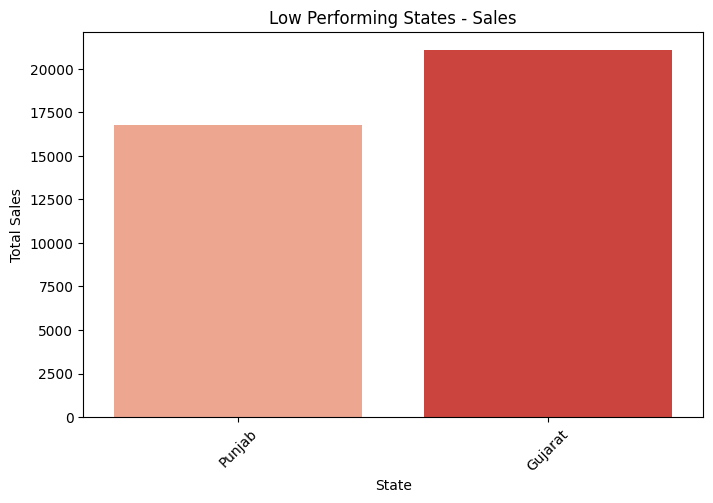

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="State", y="Total Sales", data=low_performing_states, palette="Reds")
plt.title("Low Performing States - Sales")
plt.xticks(rotation=45)
plt.show()